<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Kaggle-and-Project/blob/master/%EB%B9%85%EC%BD%98_eda_ing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os 
from google.colab import drive
drive.mount('/content/drvie')
train_data= pd.read_excel("/content/drvie/MyDrive/bigcon1.xlsx")

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


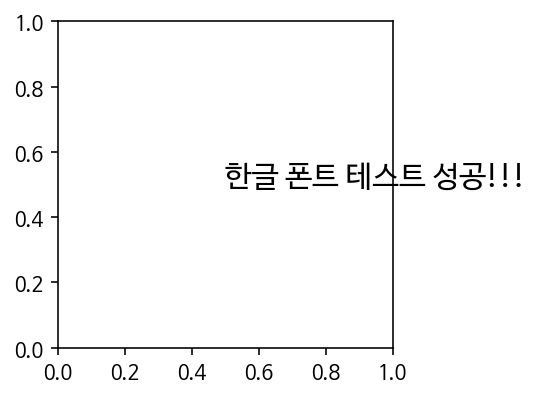

In [2]:
# 그래프 한글폰트 사용설정 in Colab - 한번 실행 후 폰트가 깨진다면 런타임 다시시작 후 한번 더 실행

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '("/content/drvie/MyDrive/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [71]:
train_data.head(5)

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [72]:
train_data.tail(5)

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
42068,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,왕게,활,38.437099
42069,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,낙지,낙지,활,8.282274
42070,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,대게,활,23.396192
42071,2019-12-30,수산물,중국,중국,판매용,패류 멍게류,바지락,바지락,활,0.852967
42072,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,13.205675


In [76]:
train_data.describe()

,P_PRICE
count,42073.000000
mean,9.545346
std,21.914624
min,0.203770
25%,2.654165
50%,5.165478
75%,9.929108
max,1522.038402


In [68]:
CTRY1_MEAN = train_data.groupby('CTRY_1')['P_PRICE'].agg(**{'CTRY_1 mean price':'mean'}).reset_index()
CTRY1_MEAN=CTRY1_MEAN.sort_values(by=['CTRY_1 mean price'], axis=0,ascending=False)

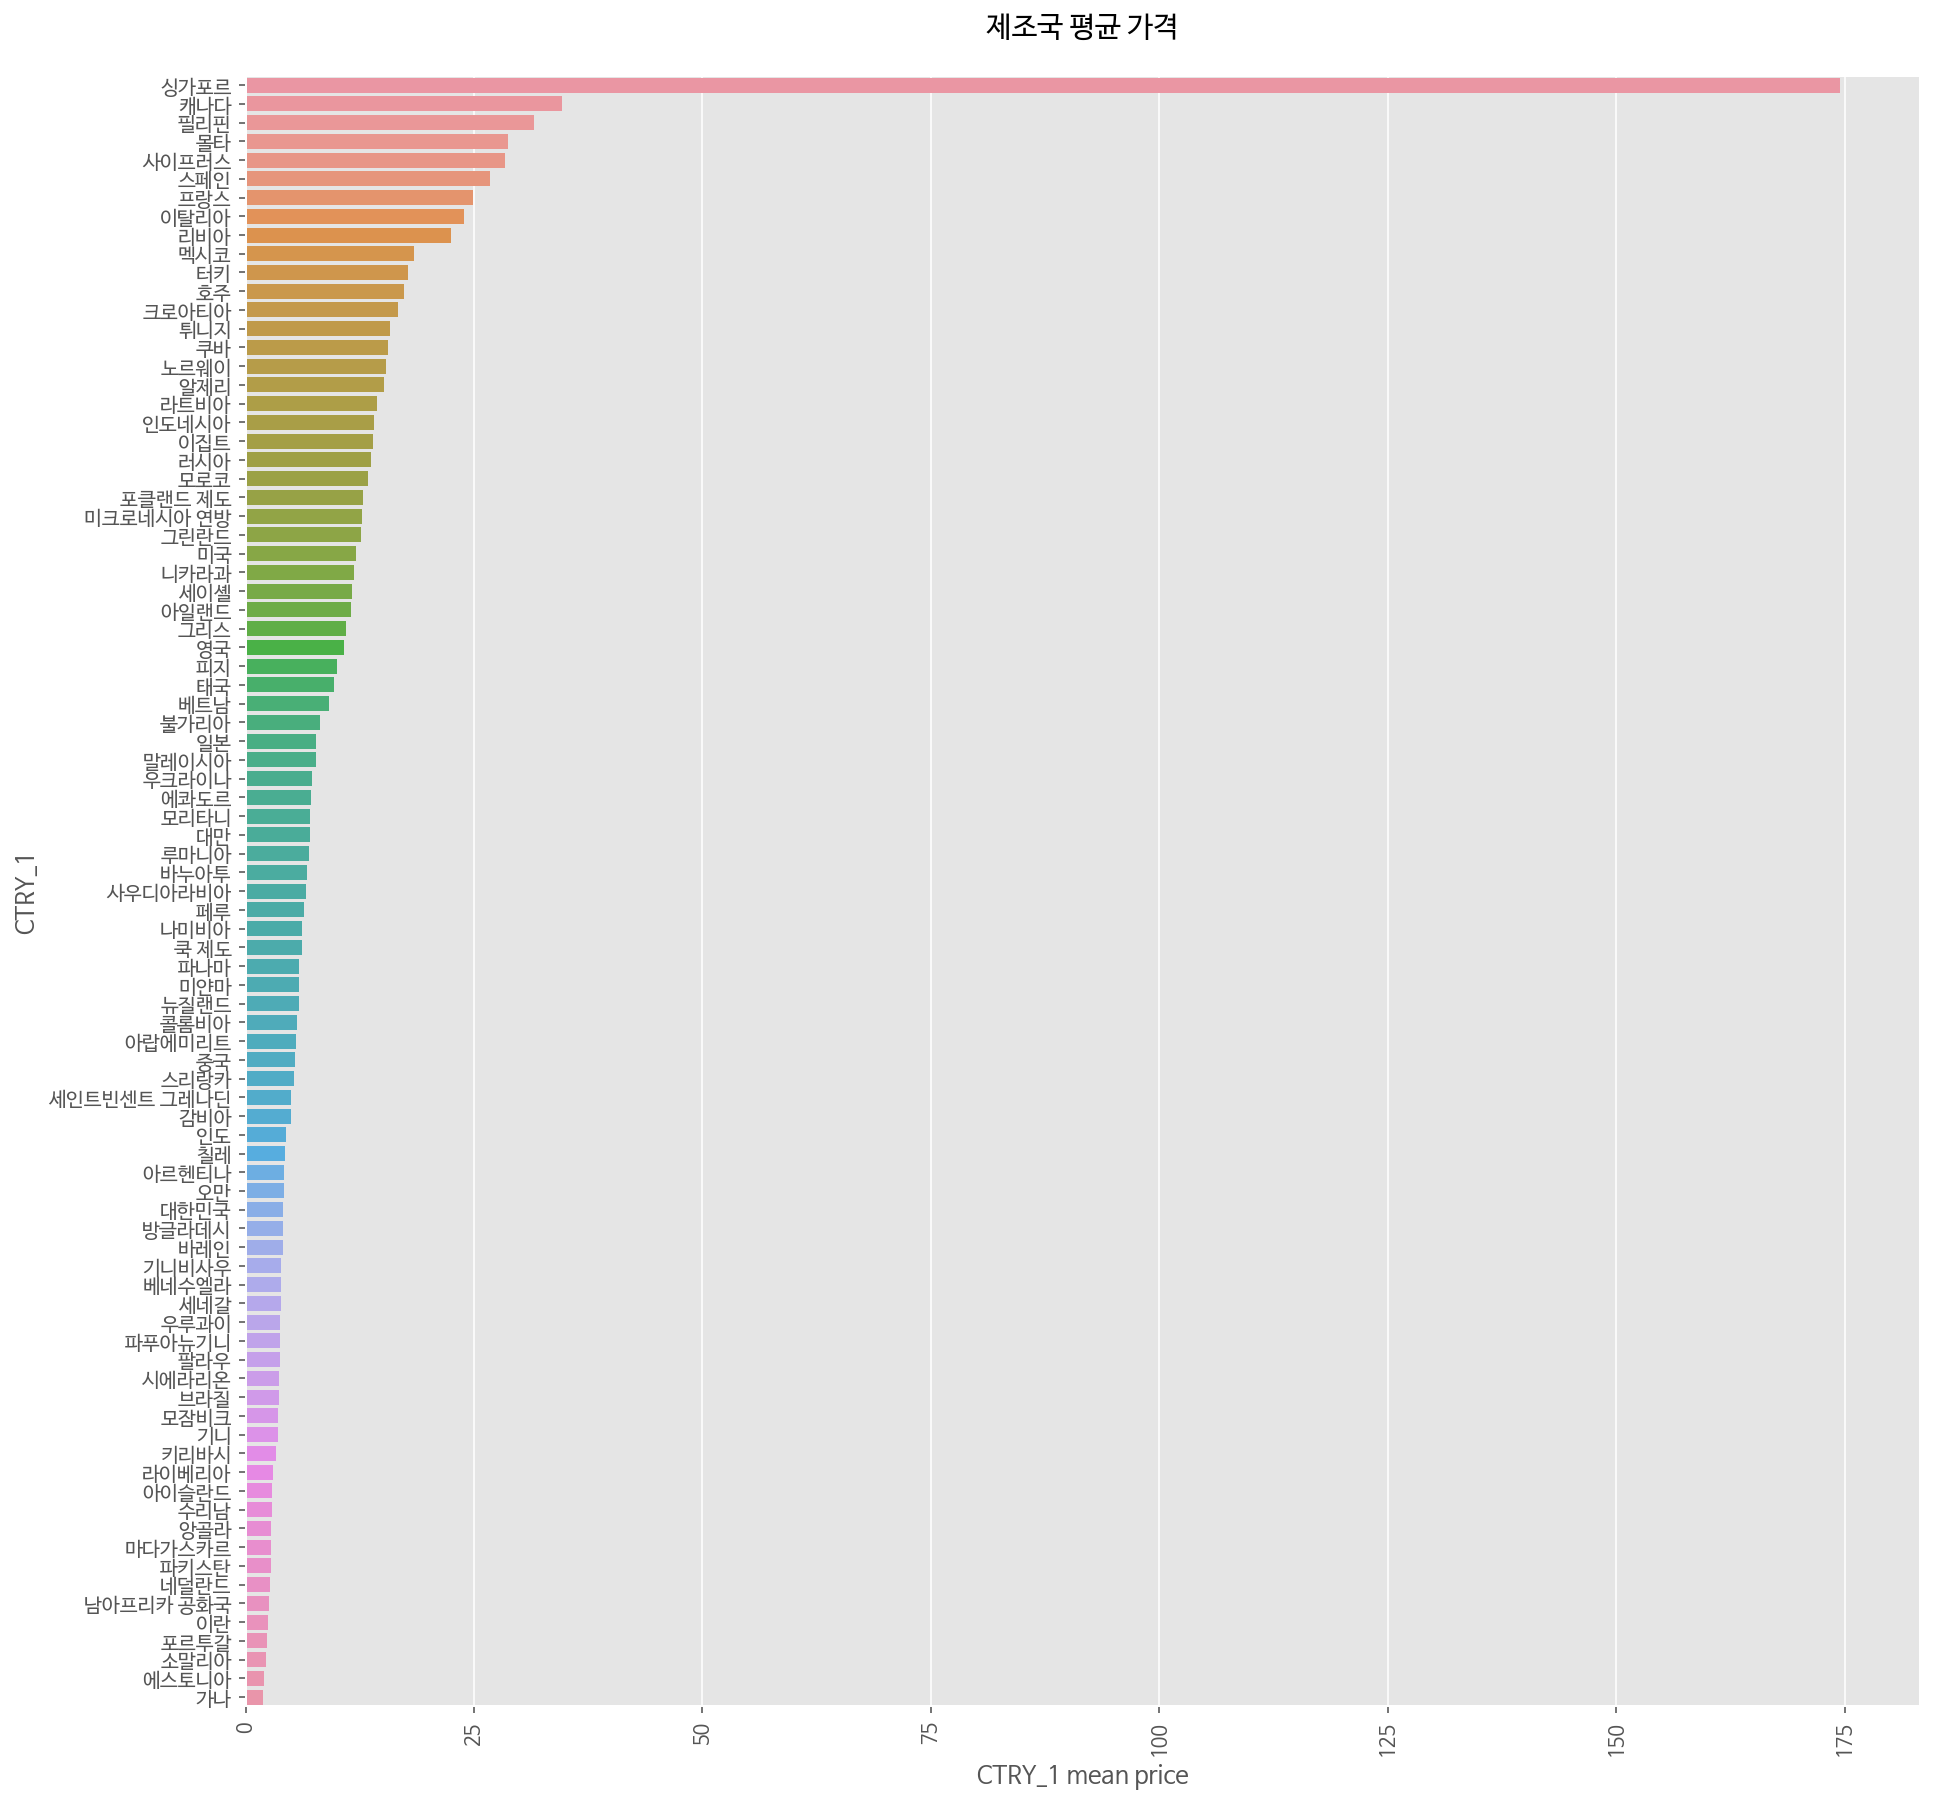

In [75]:
plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)
plt.title('제조국 평균 가격', pad= 20)
sns.barplot(data = CTRY1_MEAN, y='CTRY_1', x='CTRY_1 mean price') 

In [65]:
CATEGORY_1_MEAN=train_data.groupby('CATEGORY_1')['P_PRICE'].agg(**{'Category 1 mean price':'mean'}).reset_index()
CATEGORY_1_MEAN=CATEGORY_1_MEAN.sort_values(by=['Category 1 mean price'], axis=0,ascending=False)

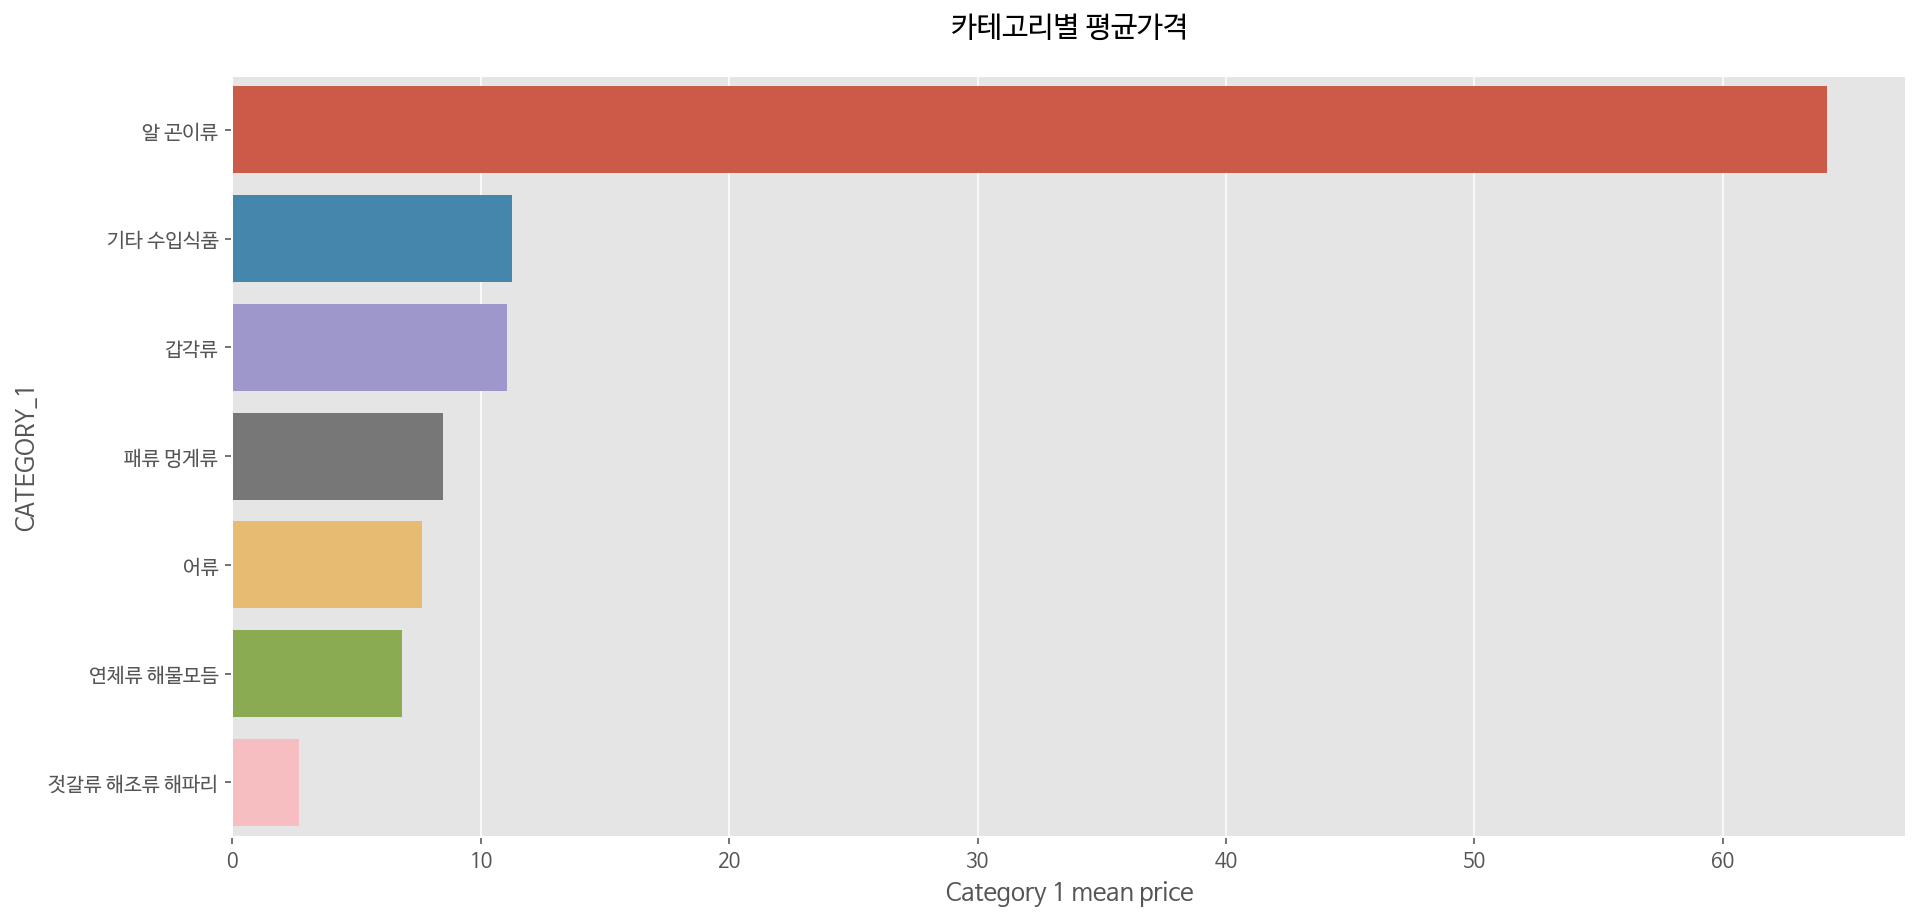

In [74]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 0)
plt.title('카테고리별 평균가격', pad= 20)
sns.barplot(data = CATEGORY_1_MEAN, y='CATEGORY_1', x='Category 1 mean price') 

In [63]:
CATEGORY_2_MEAN=train_data.groupby('CATEGORY_2')['P_PRICE'].agg(**{'Category 2 mean price':'mean'}).reset_index()
CATEGORY_2_MEAN=CATEGORY_2_MEAN.sort_values(by=['Category 2 mean price'], axis=0,ascending=False)

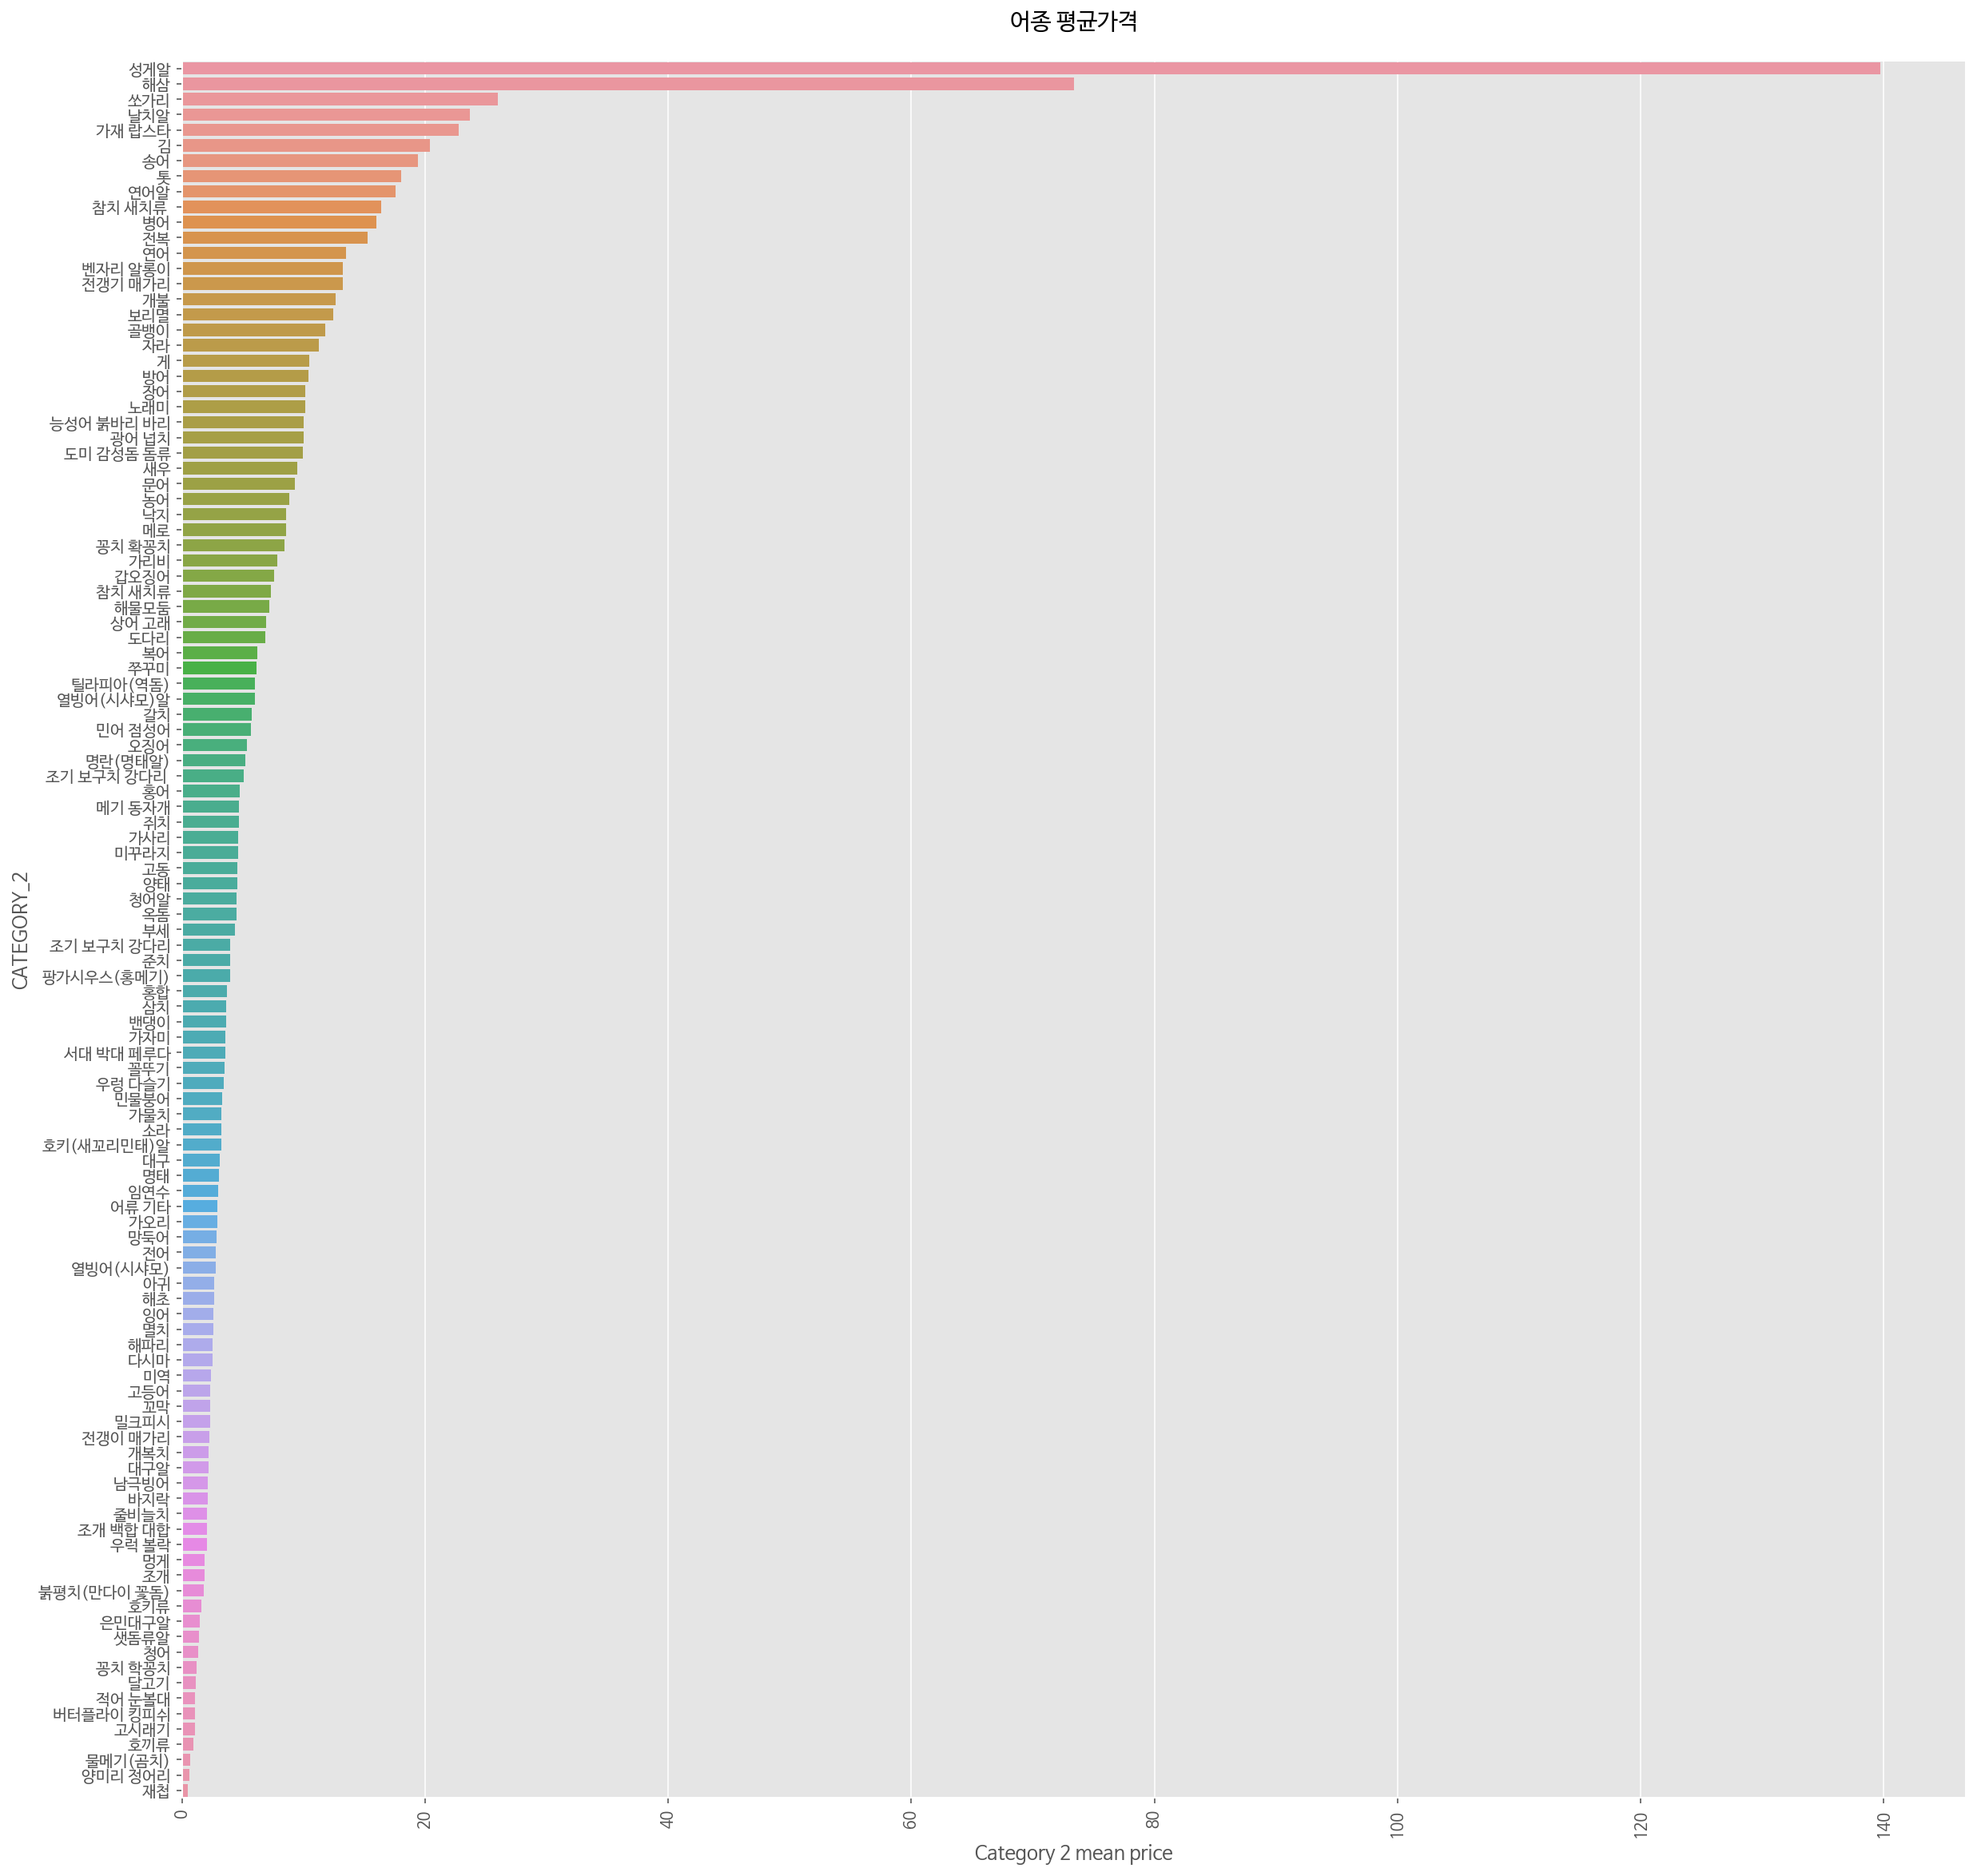

In [73]:
plt.figure(figsize=(20,20))
plt.xticks(rotation = 90)
plt.title('어종 평균가격', pad= 20)
sns.barplot(data = CATEGORY_2_MEAN, y='CATEGORY_2', x='Category 2 mean price')

In [5]:
train_data[train_data['CTRY_1'] != train_data['CTRY_2'] ]

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
17,2015-12-28,수산물,프랑스,스페인,판매용,어류,참치 새치류,대서양참다랑어,냉장,28.868041
23,2015-12-28,수산물,대한민국,북한,판매용,젓갈류 해조류 해파리,미역,미역,염장,0.913119
39,2015-12-28,수산물,대만,벨리즈,판매용,어류,꽁치 학꽁치,꽁치,냉동,0.956387
40,2015-12-28,수산물,대만,일본,판매용,어류,참치 새치류,눈다랑어,"냉동,필렛(F),횟감",12.799577
41,2015-12-28,수산물,대만,일본,판매용,어류,참치 새치류,눈다랑어,"냉동,목살,횟감",3.628571
...,...,...,...,...,...,...,...,...,...,...
42006,2019-12-30,수산물,에콰도르,베네수엘라,외화획득용 원료,어류,갈치,갈치,냉동,1.774222
42009,2019-12-30,수산물,러시아,중국,판매용,어류,명태,명태,냉동,5.051081
42030,2019-12-30,수산물,러시아,중국,판매용,어류,가자미,각시가자미,냉동,2.263721
42040,2019-12-30,수산물,러시아,중국,판매용,어류,명태,명태,"냉동,필렛(F)",3.226426


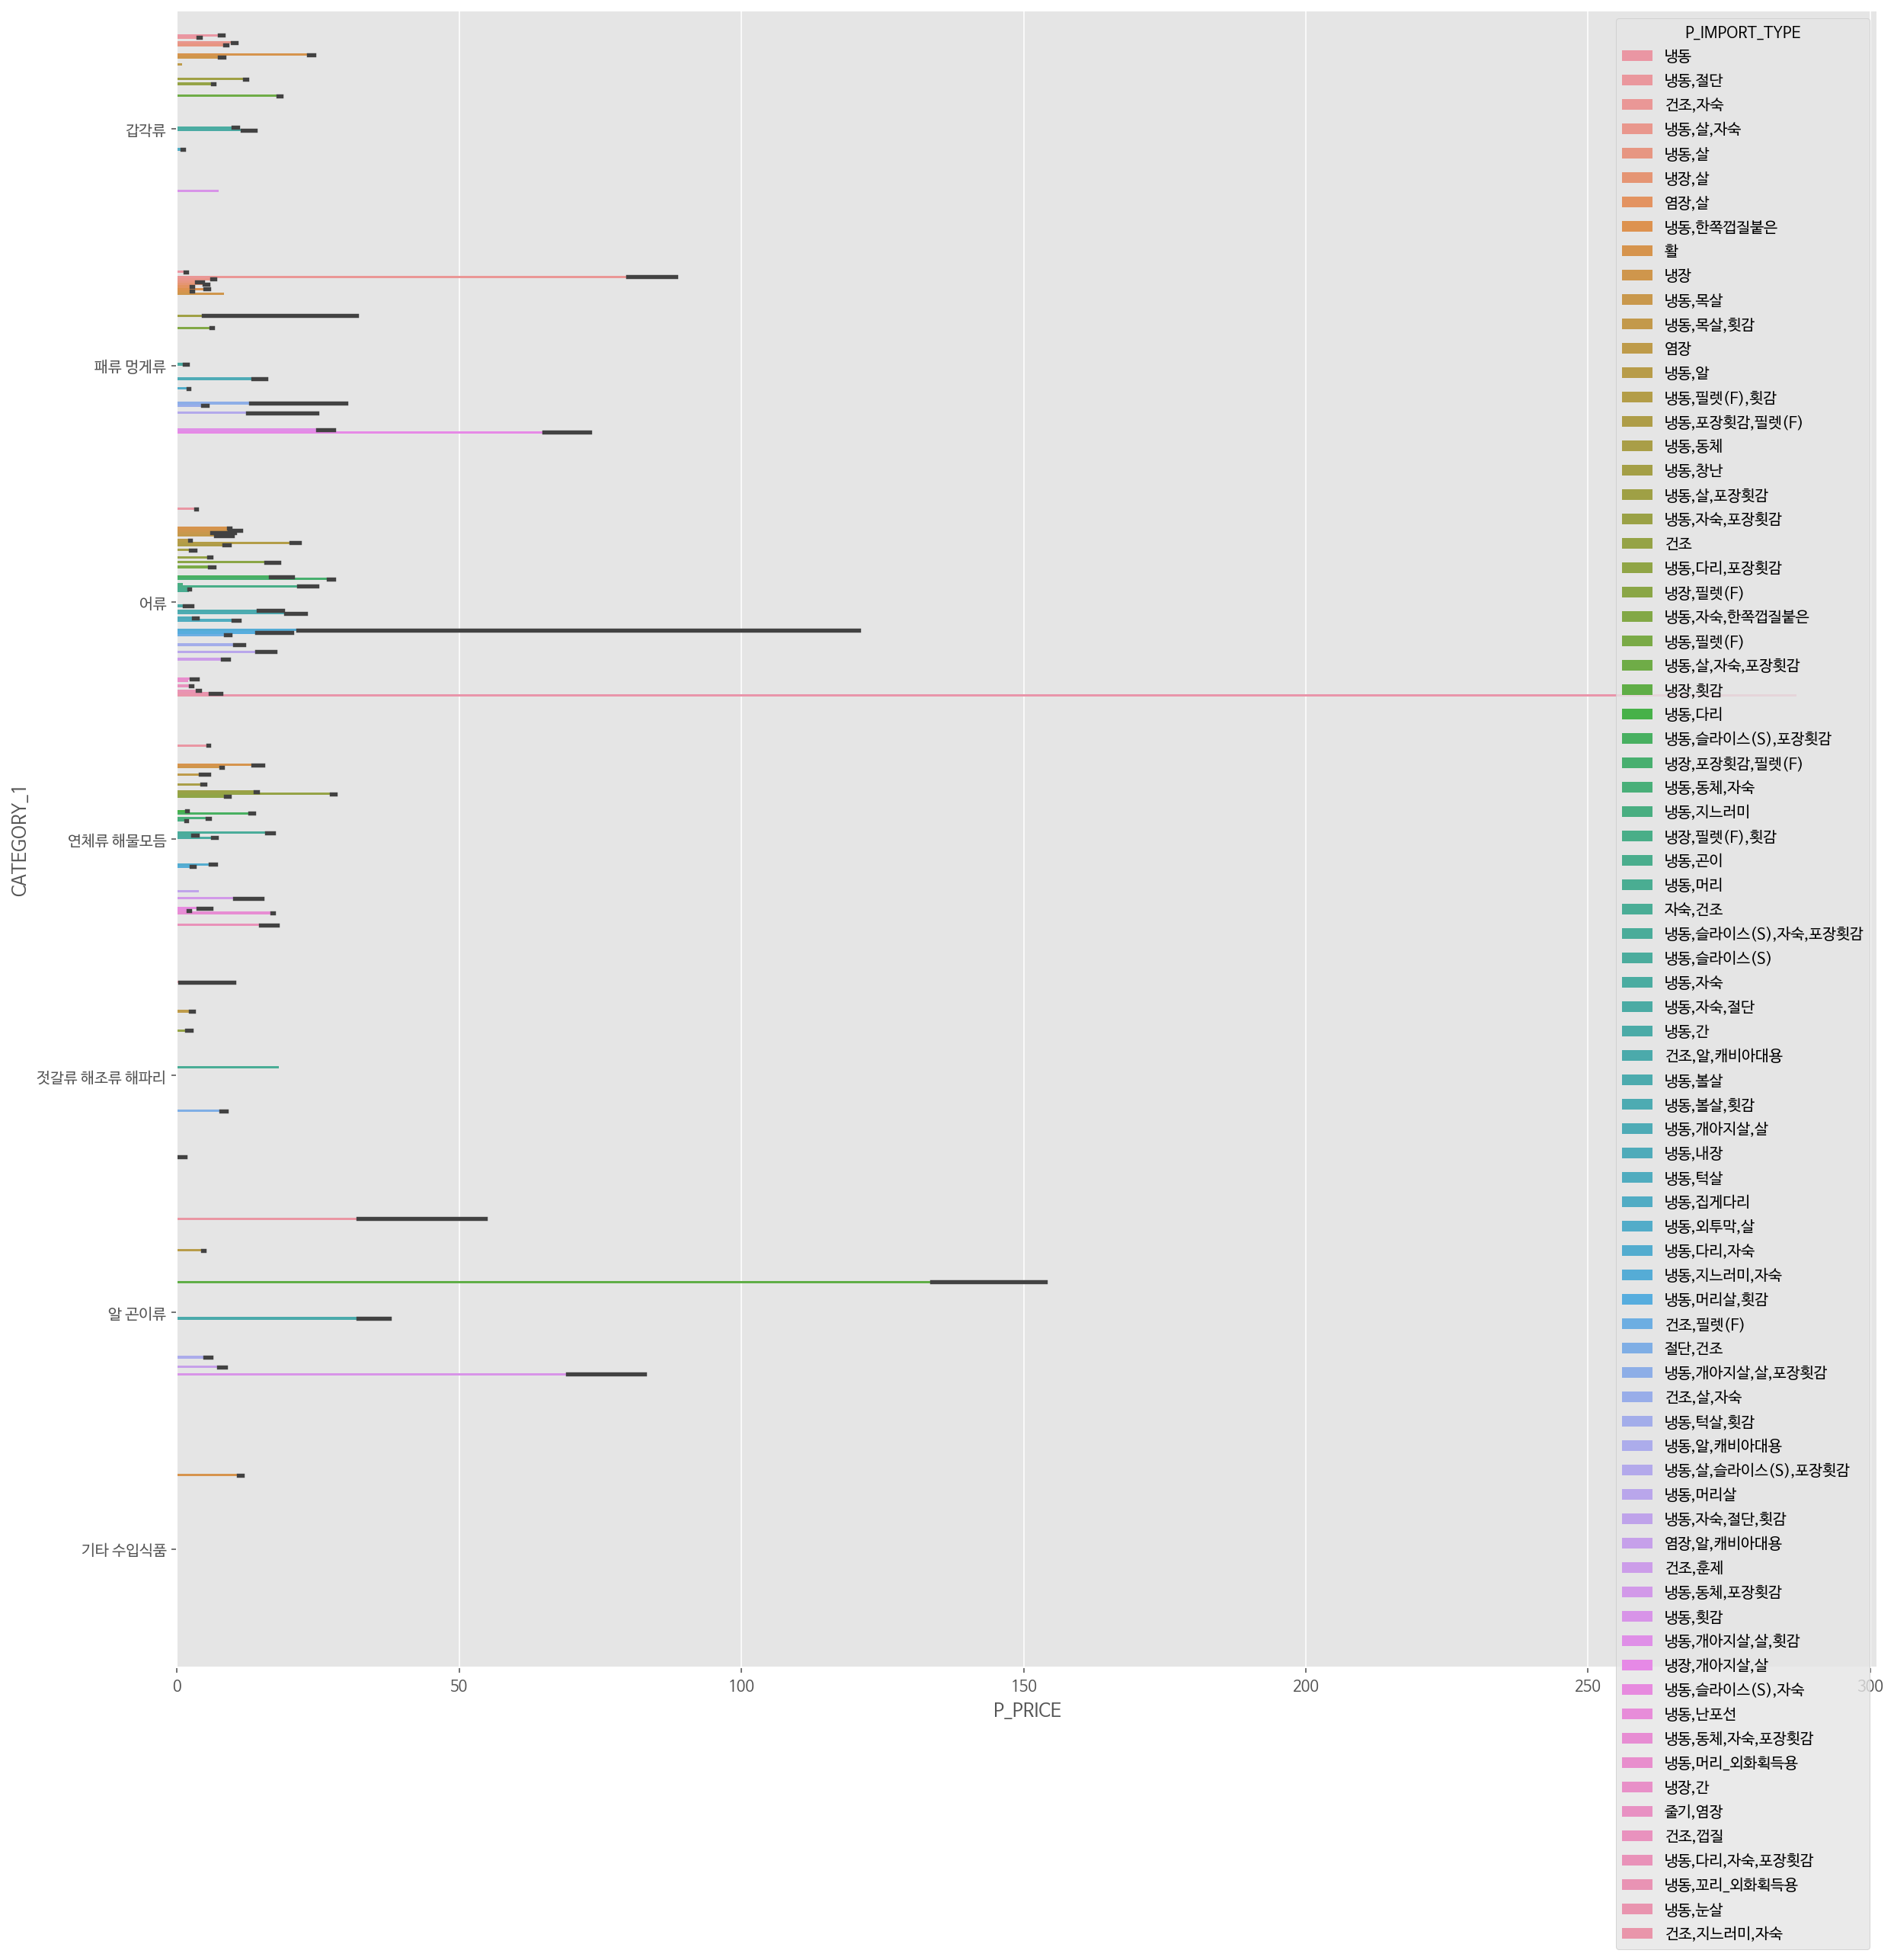

In [84]:
plt.figure(figsize=(20,20))
sns.barplot(data = train_data, y='CATEGORY_1', x='P_PRICE',hue='P_IMPORT_TYPE') 

In [6]:
train_data['P_TYPE'].value_counts()

수산물    42073
Name: P_TYPE, dtype: int64

In [7]:
train_data=train_data.drop('P_TYPE',axis=1)
y=train_data['P_PRICE']

In [8]:
objects=train_data.select_dtypes(include=['object'])
objects.columns

Index(['CTRY_1', 'CTRY_2', 'P_PURPOSE', 'CATEGORY_1', 'CATEGORY_2', 'P_NAME',
       'P_IMPORT_TYPE'],
      dtype='object')

In [9]:
range(len(objects.columns))

range(0, 7)

In [10]:
train_data.shape

(42073, 9)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42073 entries, 0 to 42072
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REG_DATE       42073 non-null  datetime64[ns]
 1   CTRY_1         42073 non-null  object        
 2   CTRY_2         42073 non-null  object        
 3   P_PURPOSE      42073 non-null  object        
 4   CATEGORY_1     42073 non-null  object        
 5   CATEGORY_2     42073 non-null  object        
 6   P_NAME         42073 non-null  object        
 7   P_IMPORT_TYPE  42073 non-null  object        
 8   P_PRICE        42073 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 2.9+ MB


In [12]:
train_data.isnull().sum()

REG_DATE         0
CTRY_1           0
CTRY_2           0
P_PURPOSE        0
CATEGORY_1       0
CATEGORY_2       0
P_NAME           0
P_IMPORT_TYPE    0
P_PRICE          0
dtype: int64

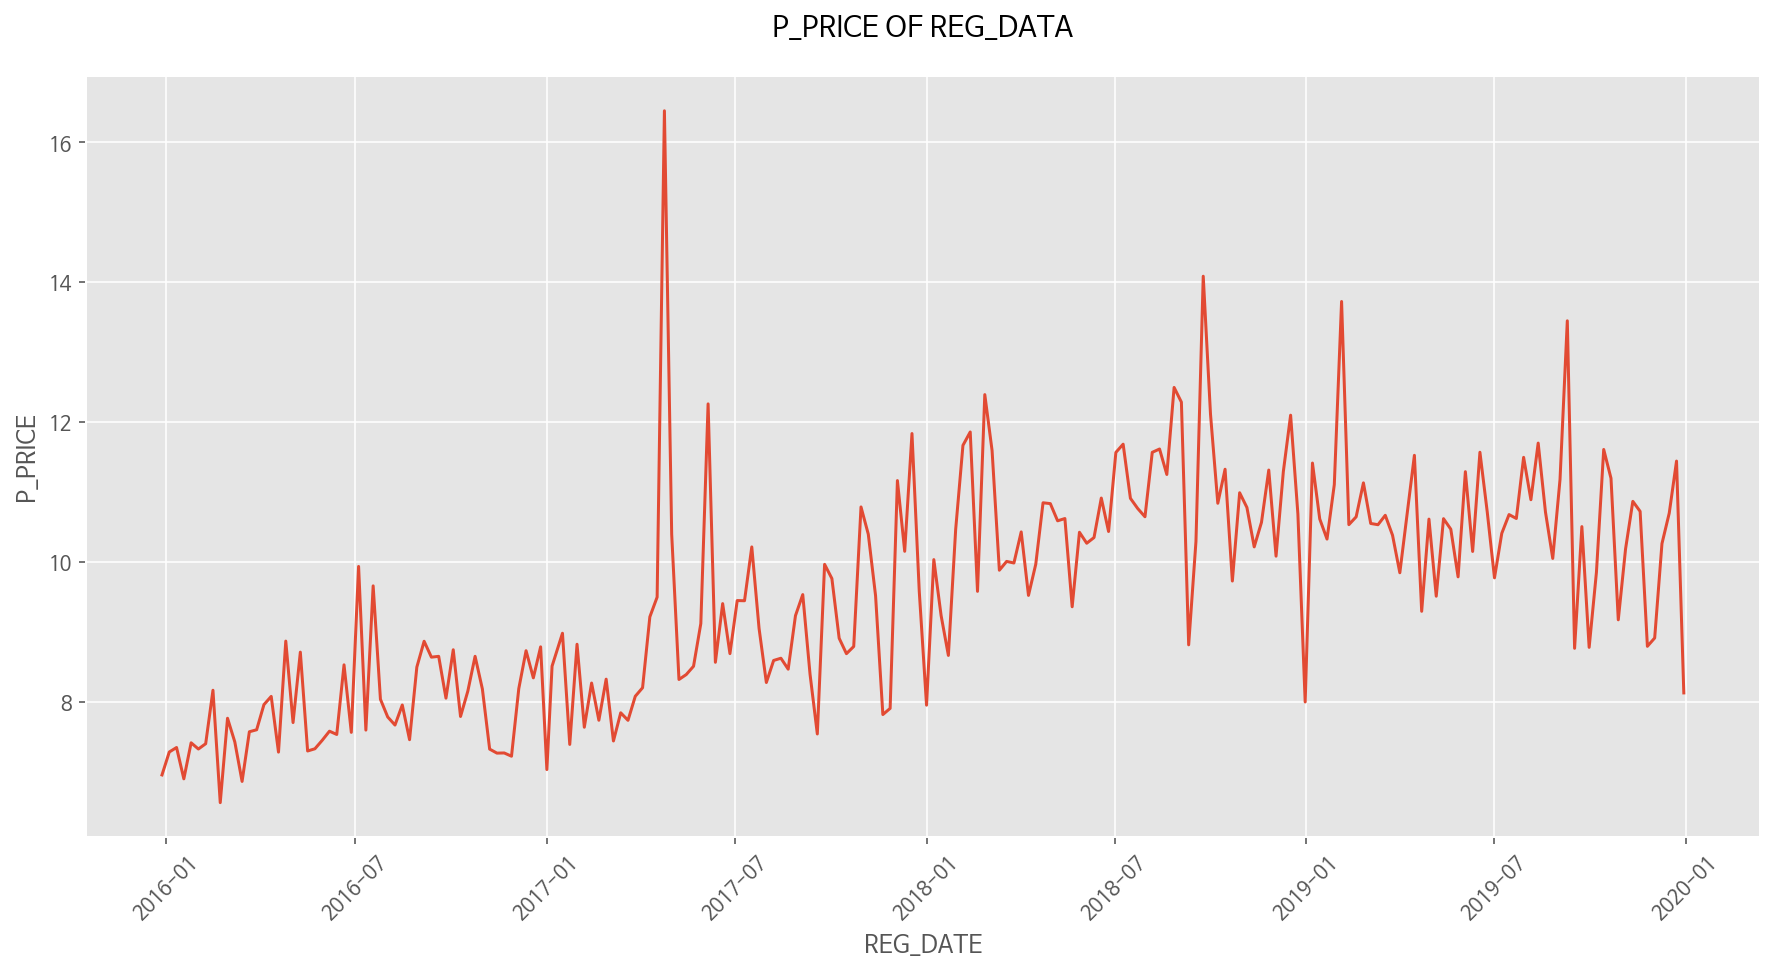

In [86]:
plt.figure(figsize=(15,7))
plt.xticks(rotation = 45)
plt.style.use('ggplot')
plt.title('P_PRICE OF REG_DATA', pad= 20)
sns.lineplot(data = train_data, x='REG_DATE', y='P_PRICE',ci=None) 

In [15]:
sortvalue=train_data['CTRY_1'].value_counts()
sortvalue

중국           11029
러시아           4031
베트남           3946
일본            2855
미국            2777
             ...  
이란               1
수리남              1
미크로네시아 연방        1
팔라우              1
니카라과             1
Name: CTRY_1, Length: 87, dtype: int64

In [16]:
sortvalue2=train_data['CTRY_2'].value_counts()
sortvalue2

중국      12008
일본       4849
베트남      4027
러시아      2924
미국       2400
        ...  
이탈리아        1
쿠바          1
팔라우         1
이란          1
벨리즈         1
Name: CTRY_2, Length: 88, dtype: int64

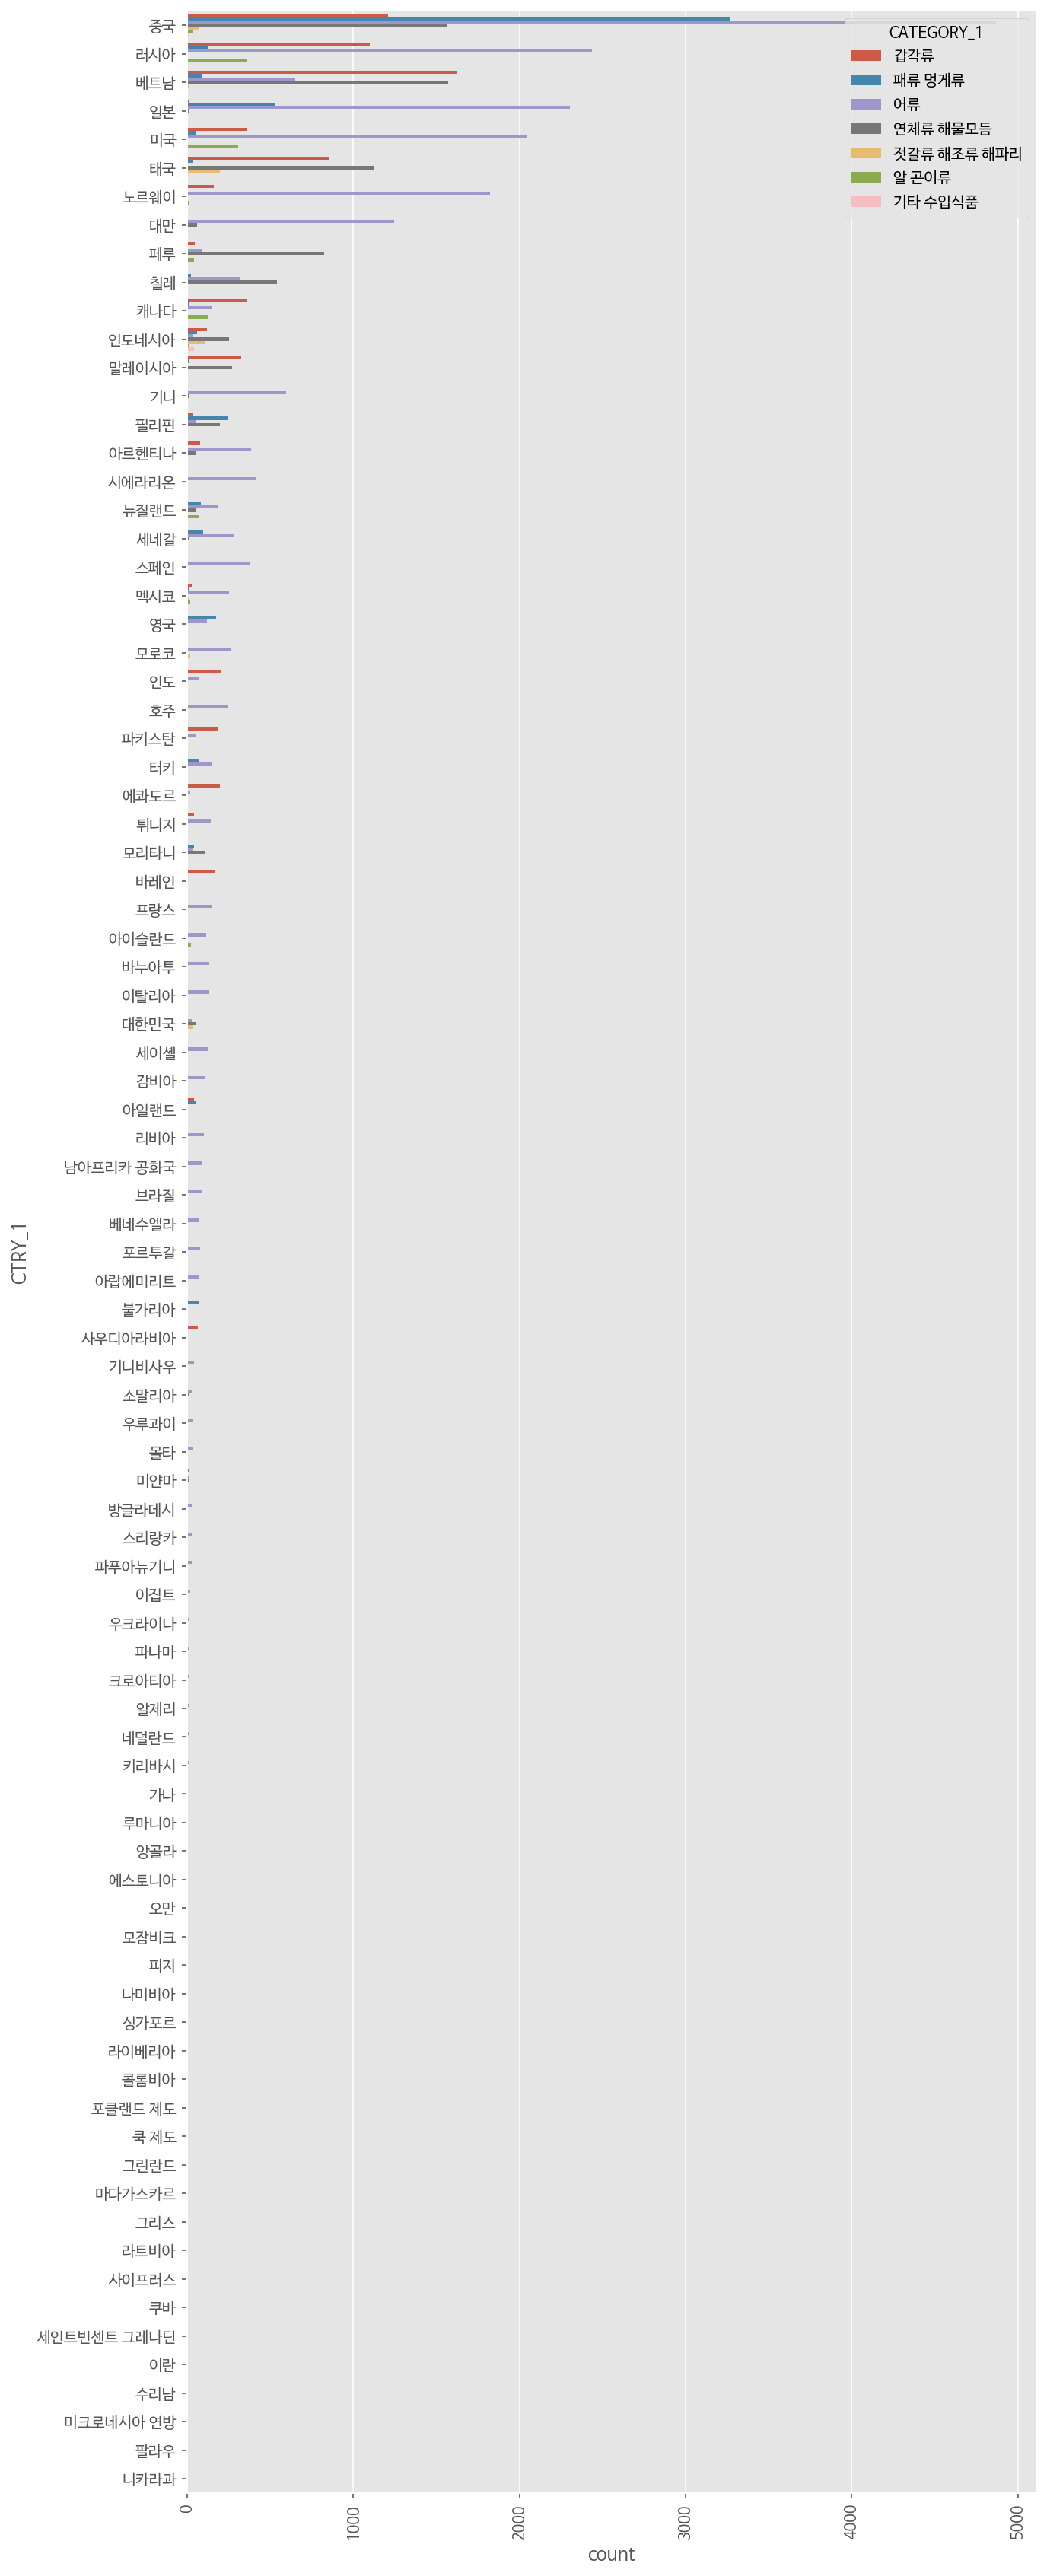

In [80]:
plt.figure(figsize=(10,30))
sns.countplot(data =train_data,y='CTRY_1',hue='CATEGORY_1',order = sortvalue.index)
plt.xticks(rotation=90)
plt.show()

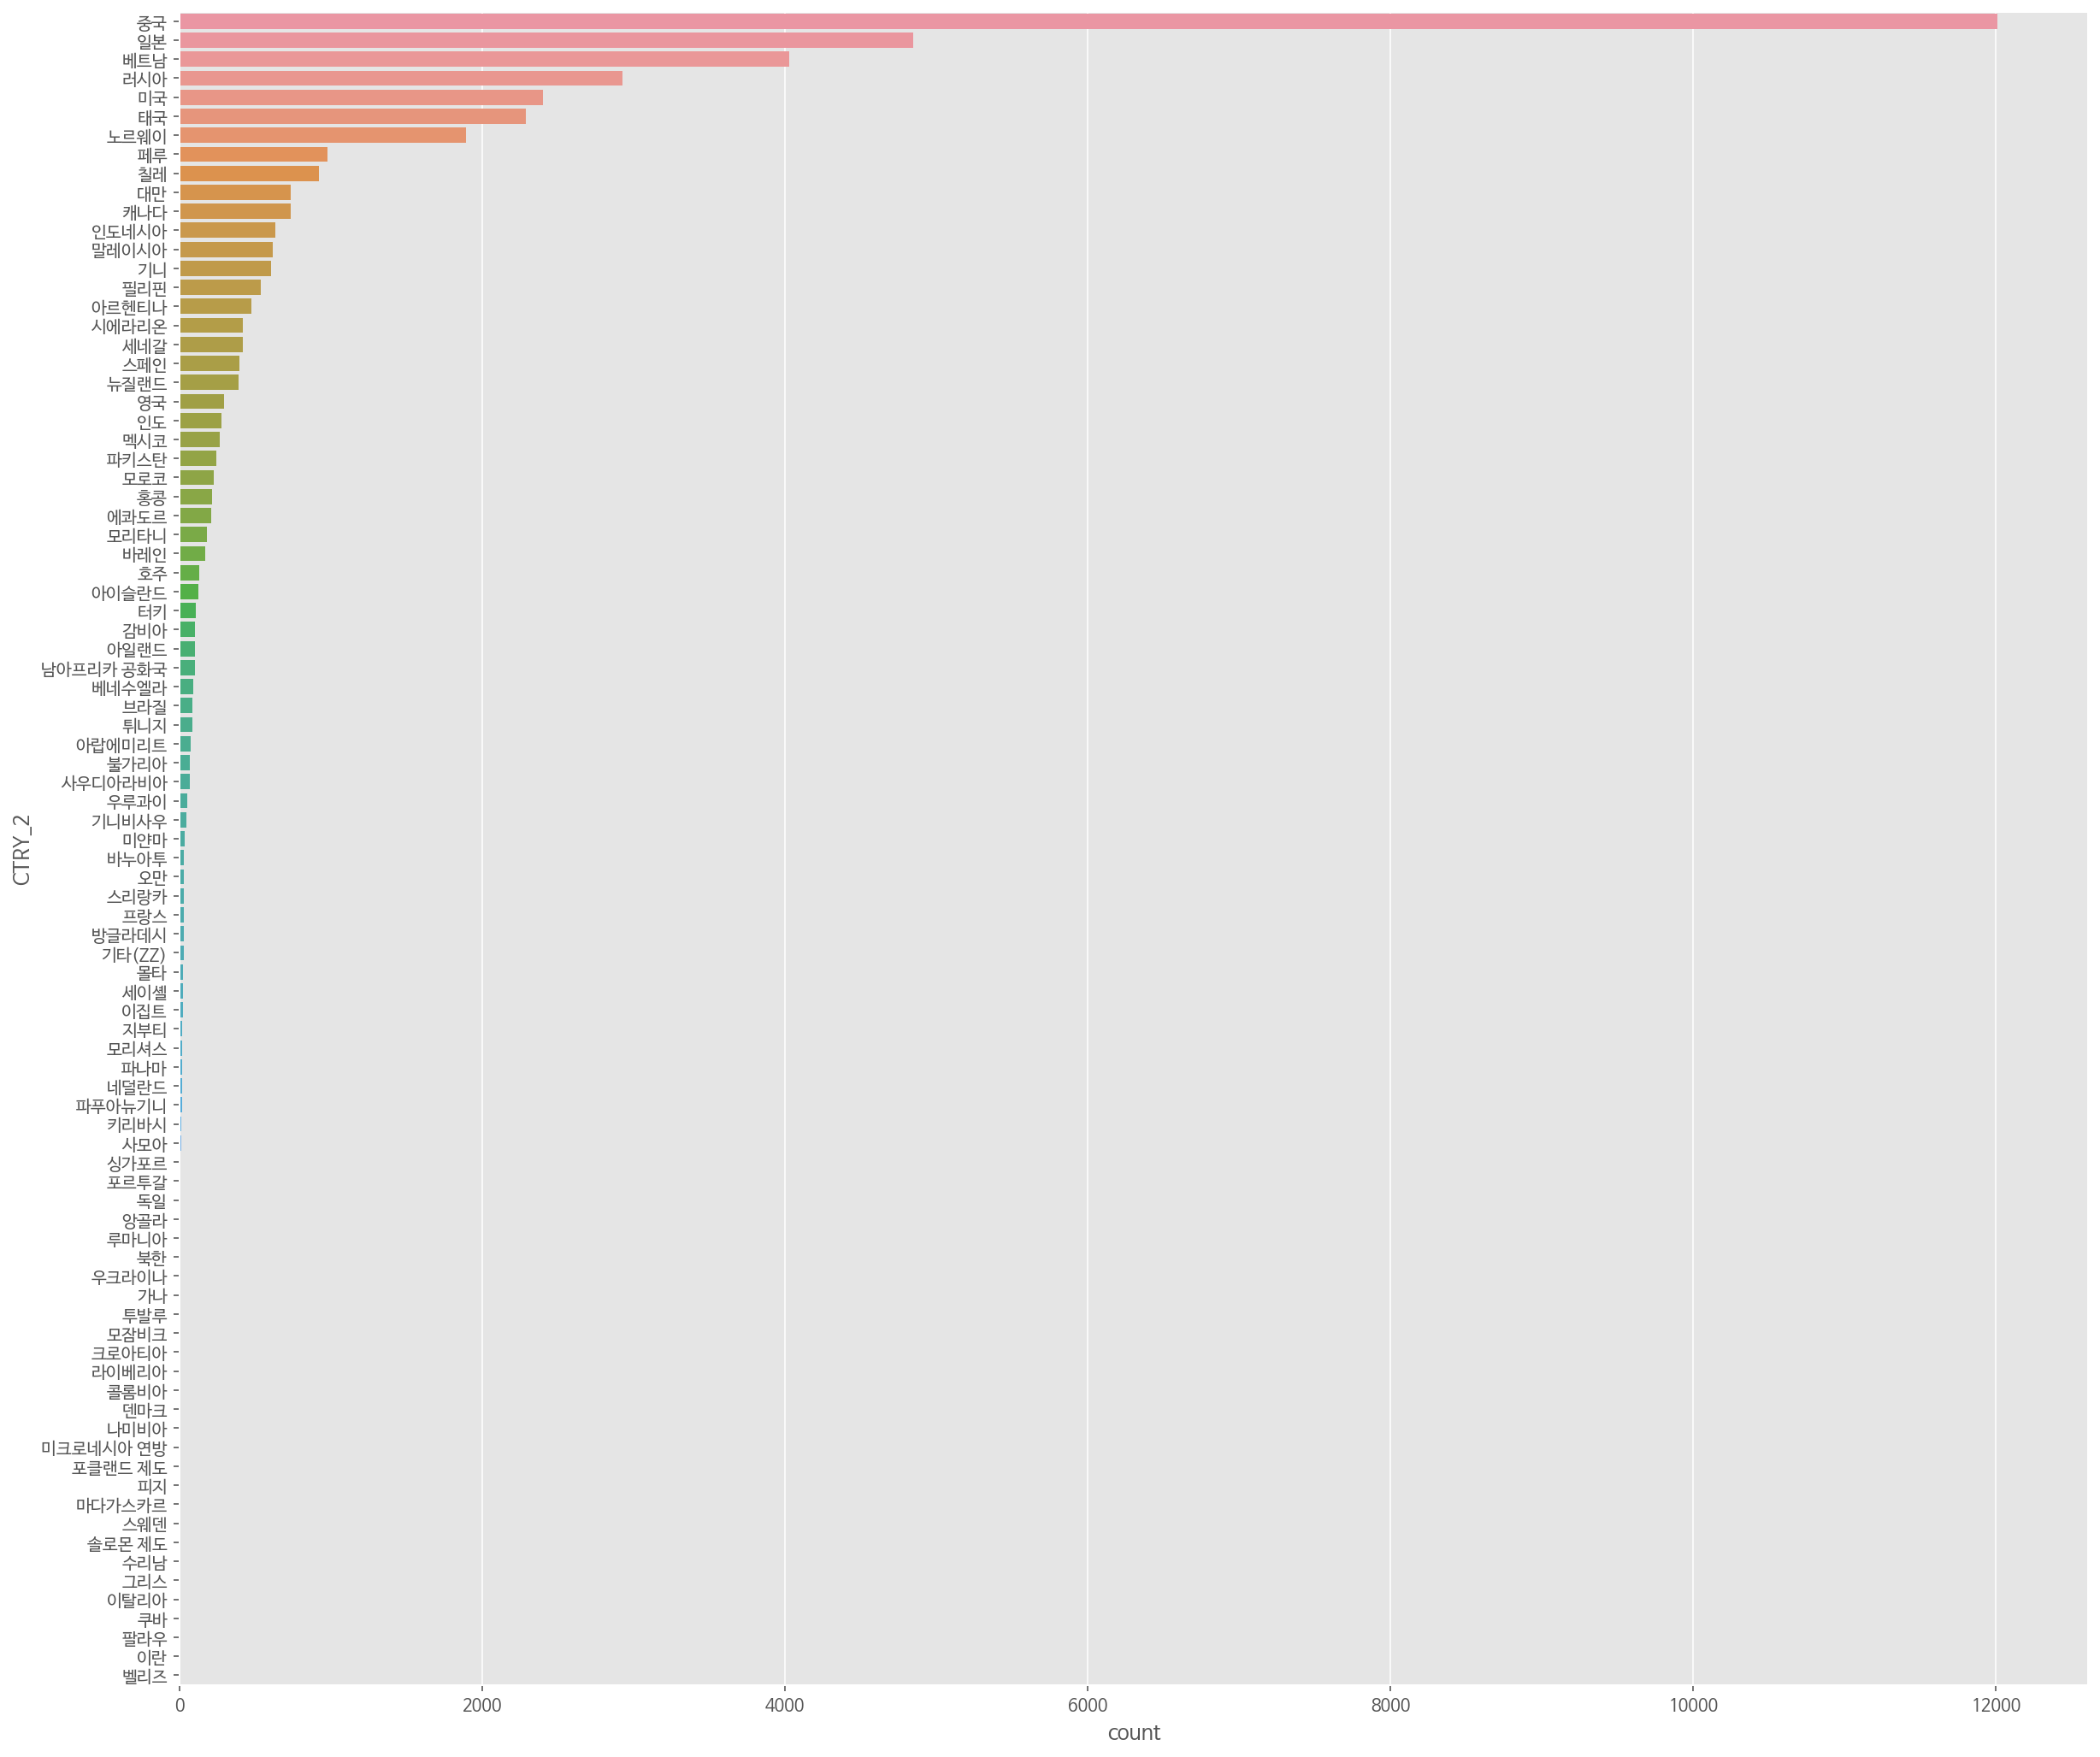

In [22]:
plt.figure(figsize=(20,18))
sns.countplot(data =train_data,y='CTRY_2',order = sortvalue2.index)
plt.show()

In [23]:
CATEGORY_1=train_data['CATEGORY_1'].value_counts()
CATEGORY_1

어류             21339
갑각류             7298
연체류 해물모듬        6772
패류 멍게류          5097
알 곤이류           1037
젓갈류 해조류 해파리      467
기타 수입식품           63
Name: CATEGORY_1, dtype: int64

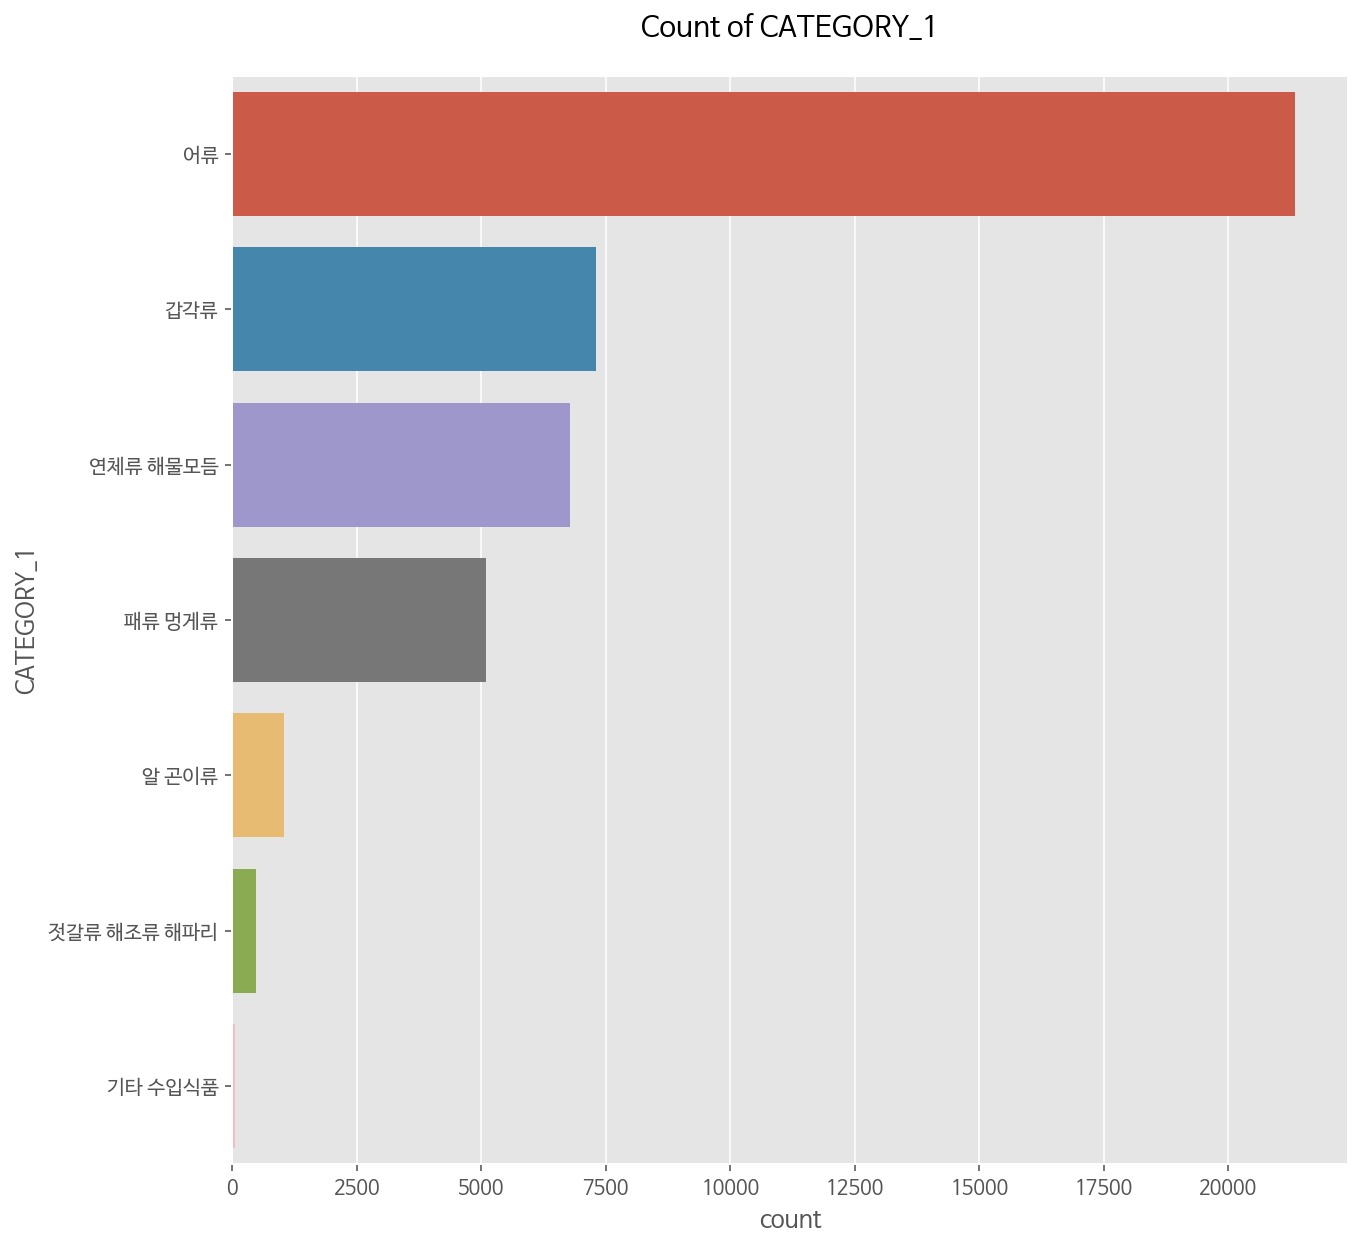

In [77]:
plt.figure(figsize=(10,10))
plt.title('Count of CATEGORY_1', pad= 20)
sns.countplot(data =train_data,y='CATEGORY_1',order = CATEGORY_1.index)
plt.show()

In [25]:
CATEGORY_2 = train_data['CATEGORY_2'].value_counts()
CATEGORY_2

새우           4141
참치 새치류       3159
오징어          2662
게            2477
연어           1905
             ... 
버터플라이 킹피쉬       1
은민대구알           1
톳               1
김               1
물메기(곰치)         1
Name: CATEGORY_2, Length: 113, dtype: int64

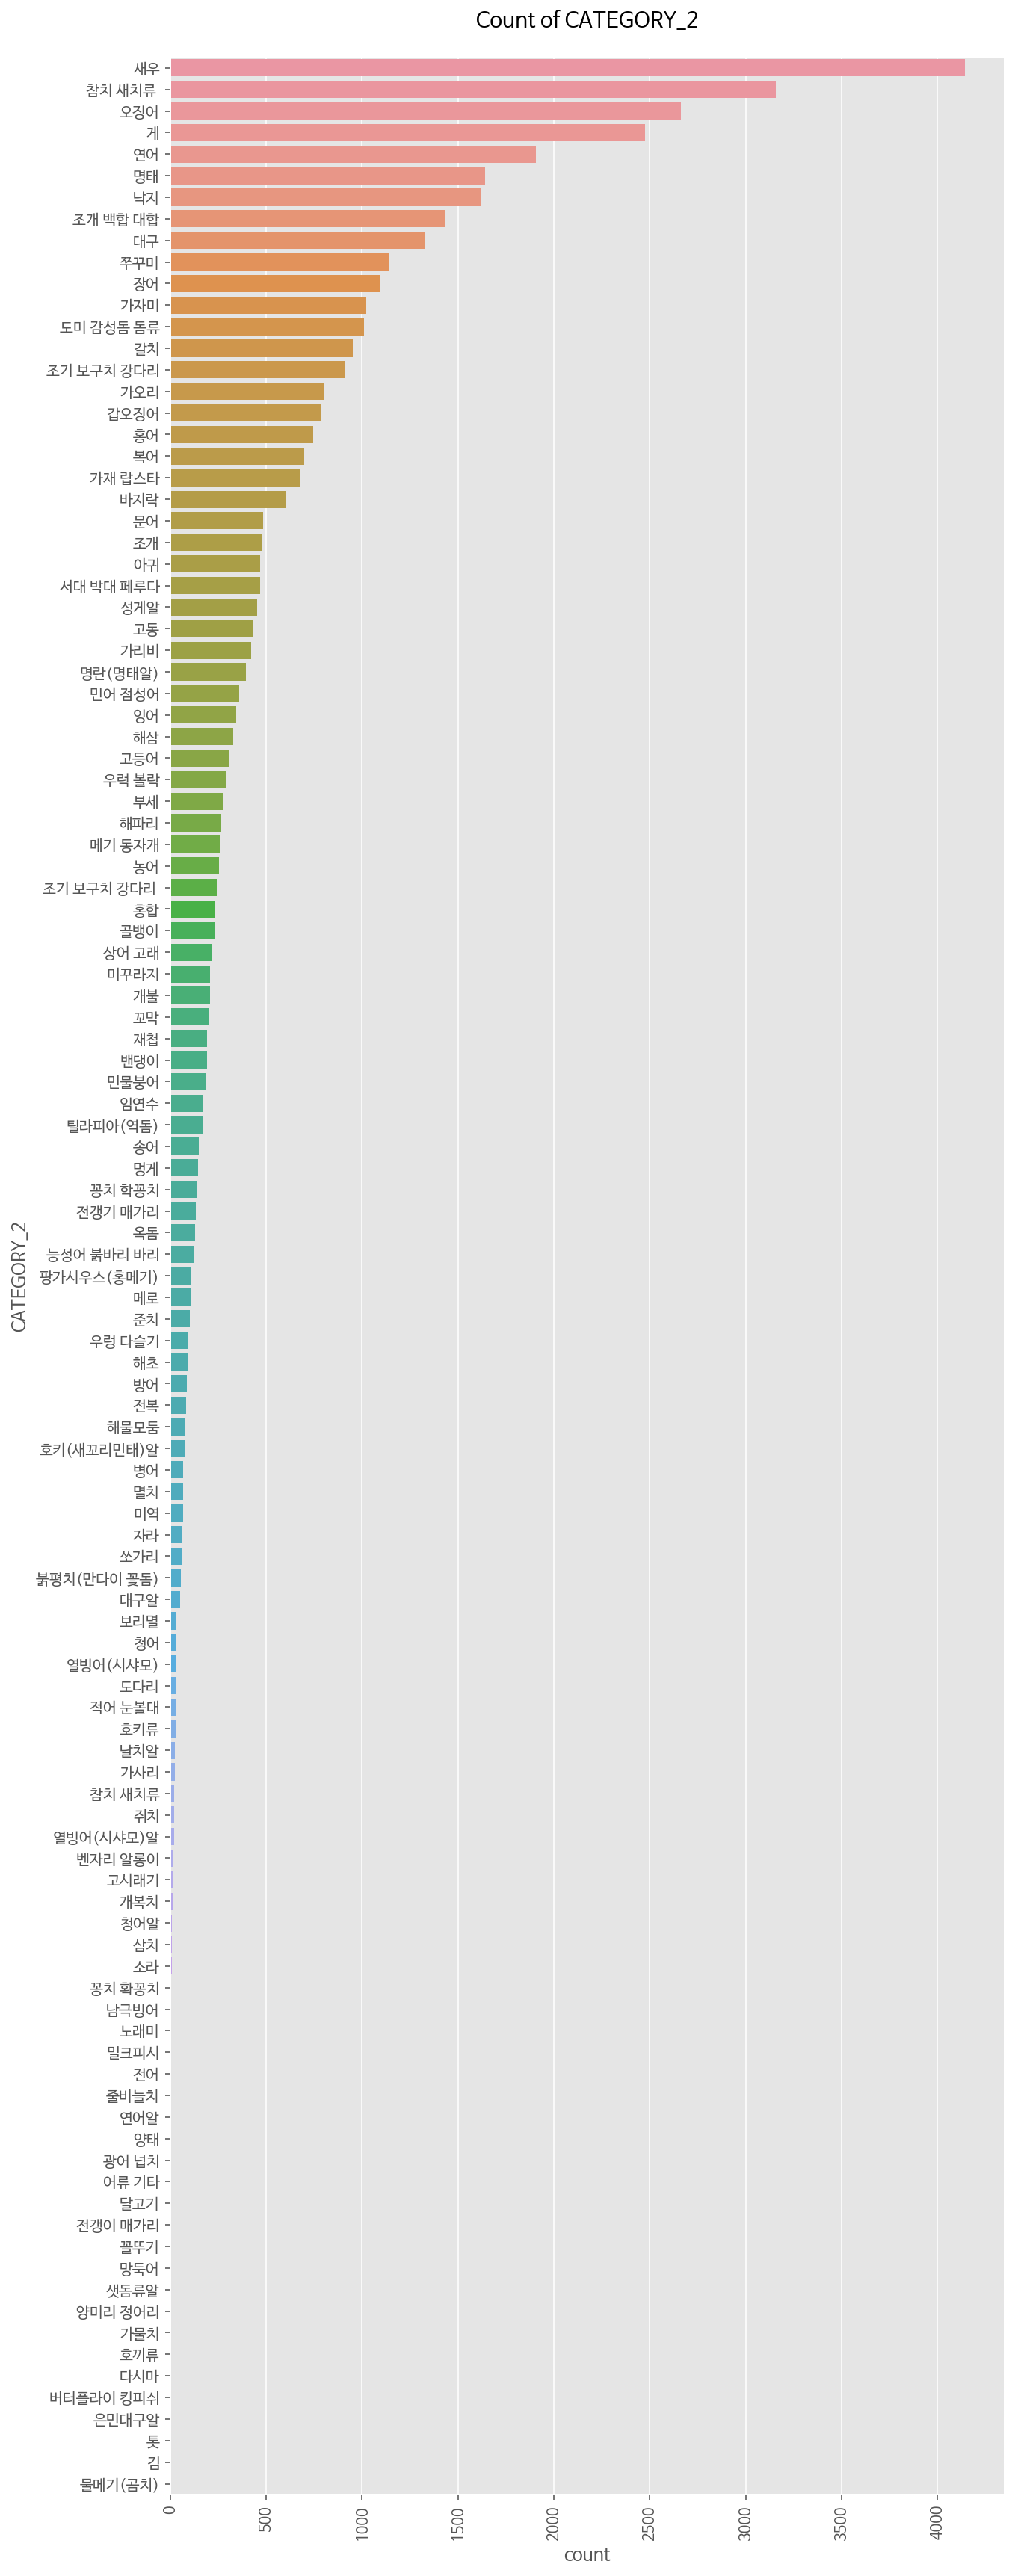

In [28]:
plt.figure(figsize=(10,30))
plt.title('Count of CATEGORY_2', pad= 20)
plt.xticks(rotation=90)
sns.countplot(data =train_data,y='CATEGORY_2',order = CATEGORY_2.index)
plt.show()